In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as p
from scipy.stats import stats
from scipy.optimize import curve_fit
import scipy.optimize

### Without Feedback

In [2]:
#read csv files using panda
#use 'skiprows' to define data sets before and after the threshhold
h = p.read_csv('thresholdData.csv')
h_above = p.read_csv('thresholdData.csv', skiprows=[1,2,3])
h_below = p.read_csv('thresholdData.csv', skiprows=[i for i in range(5,15)])

In [4]:
#uncomment to view data table
#h
#h_above
h_below

,mA,mW
0,7,0.03
1,8,0.04
2,9,0.05
3,10,0.08


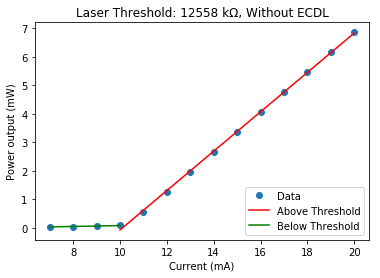

In [21]:
#plot data
plt.plot(h.mA, h.mW, 'o', label='Data')

#fit and pot a line above the threshhold
def test(x, m, b): 
    return m*x+b
param, param_cov = curve_fit(test, h_above.mA, h_above.mW)
plt.plot(h_above.mA, test(h_above.mA, *param), 'r', label = 'Above Threshold')

#fit and pot a line below the threshhold
def test2(x, m, b): 
    return m*x+b
param2, param_cov2 = curve_fit(test, h_below.mA, h_below.mW)
plt.plot(h_below.mA, test(h_below.mA, *param2), 'g', label = 'Below Threshold')

#labels
plt.xlabel('Current (mA)')
plt.ylabel('Power output (mW)')
plt.title('Laser Threshold: 12558 kΩ, Without ECDL')
plt.legend(loc='lower right')

Find intersection of fitted lines for lasing threshhold. 

In [9]:
def intersect(x):
    return test2(x, *param2) - test(x, *param)

print('Threshhold current = ', scipy.optimize.brentq(intersect, 8,12), 'mA')

Threshhold current =  10.226831896551724 mA


### With Feedback

In [10]:
#read csv files using panda
#use 'skiprows' to define data sets before and after the threshhold
f = p.read_csv('thresholdDataWithFeedback.csv')
f_above = p.read_csv('thresholdDataWithFeedback.csv', skiprows = [i for i in range(1,7)])
f_below =  p.read_csv('thresholdDataWithFeedback.csv', skiprows = [i for i in range(8,14)])

In [ ]:
#uncomment to view data table
#f
#f_above
#f_below

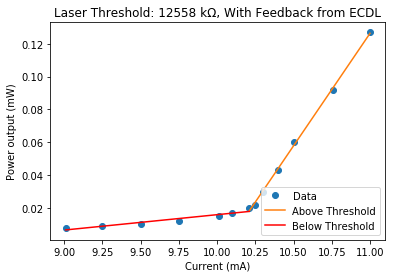

In [22]:
#plot data
plt.plot(f.mA, f.mW, 'o', label='Data')

#fit and pot a line above the threshhold
def test3(x, m, b): 
    return m*x+b
param3, param_cov3 = curve_fit(test3, f_above.mA, f_above.mW, p0 = [0.1,0.03])
plt.plot(f_above.mA, test3(f_above.mA, *param3), label = 'Above Threshold')

#fit and pot a line below the threshhold
def test4(x, m, b): 
    return m*x+b
param4, param_cov4 = curve_fit(test4, f_below.mA, f_below.mW)
plt.plot(f_below.mA, test4(f_below.mA, *param4), 'r', label = 'Below Threshold')

#labels
plt.xlabel('Current (mA)')
plt.ylabel('Power output (mW)')
plt.title('Laser Threshold: 12558 kΩ, With Feedback from ECDL')
plt.legend(loc='lower right')

Find intersection of fitted lines for lasing threshhold. 

In [ ]:
def intersect(x):
    return test2(x, *param2) - test(x, *param)

print('Threshhold current = ', scipy.optimize.brentq(intersect, 8,12), 'mA')